<a href="https://colab.research.google.com/github/GANDEPRANEETH/vision-ai-cats-dogs/blob/main/Image_Recognition_5Days_Bootcamp_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 01

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gandepraneeth","key":"e745053f4782ca13b5506926698582c1"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_test_ = x_test/ 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


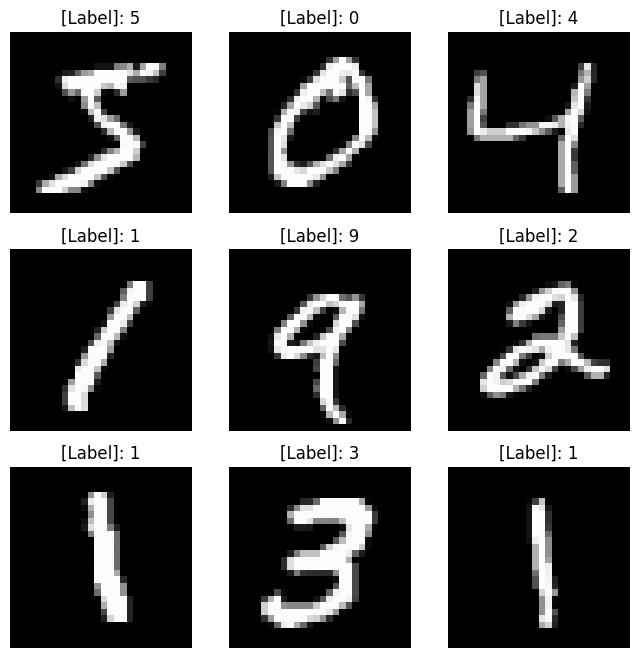

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"[Label]: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10),(x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape} ")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3) 


DAY 02

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten

model = Sequential ([
  Conv2D(32, (3,3),activation = 'relu', input_shape = (28,28,1)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3),activation ='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10,activation= 'softmax')
])

model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model. summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8945 - loss: 0.3414 - val_accuracy: 0.9776 - val_loss: 0.0755
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9853 - loss: 0.0484 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9905 - loss: 0.0316 - val_accuracy: 0.9837 - val_loss: 0.0526
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9920 - loss: 0.0238 - val_accuracy: 0.9870 - val_loss: 0.0455
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9883 - val_loss: 0.0396


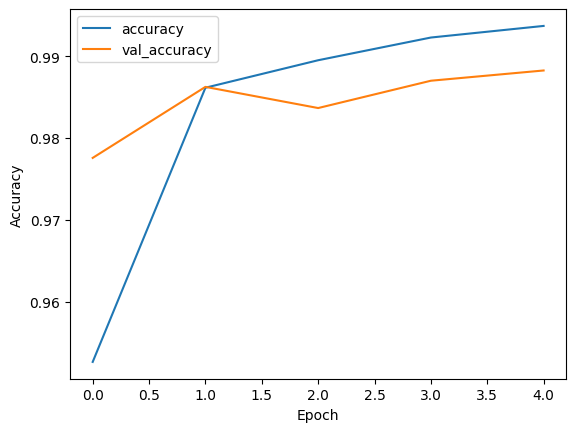

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {test_acc:df}")
y_pred = model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9850 - loss: 8.3134
Test accuracy: {test_acc:df}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential ([
  Conv2D(32, (3,3),activation = 'relu', input_shape = (28,28,1)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3),activation ='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10,activation= 'softmax')
])

model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Day 03

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3),activation = 'relu', input_shape = (32,32,3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3),activation ='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10,activation= 'softmax')
])
model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10,validation_data=(x_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 66ms/step - accuracy: 0.2857 - loss: 1.9207 - val_accuracy: 0.4905 - val_loss: 1.4162
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4296 - loss: 1.5611 - val_accuracy: 0.5093 - val_loss: 1.3693
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.4807 - loss: 1.4428 - val_accuracy: 0.5852 - val_loss: 1.1651
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 62ms/step - accuracy: 0.5086 - loss: 1.3737 - val_accuracy: 0.5915 - val_loss: 1.1464
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - accuracy: 0.5230 - loss: 1.3319 - val_accuracy: 0.5858 - val_loss: 1.1374
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 64ms/step - accuracy: 0.5401 - loss: 1.2959 - val_accuracy: 0.5822 - val_loss: 1.1749
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5499 - loss: 1.2611 - val_accuracy: 0.5967 - val_loss: 1.1493
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 66ms/step - accuracy: 0.5599 - loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1000
           1       0.73      0.80      0.77      1000
           2       0.57      0.48      0.52      1000
           3       0.53      0.40      0.46      1000
           4       0.67      0.48      0.56      1000
           5       0.64      0.47      0.54      1000
           6       0.54      0.84      0.66      1000
           7       0.61      0.77      0.68      1000
           8       0.80      0.76      0.78      1000
           9       0.66      0.78      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



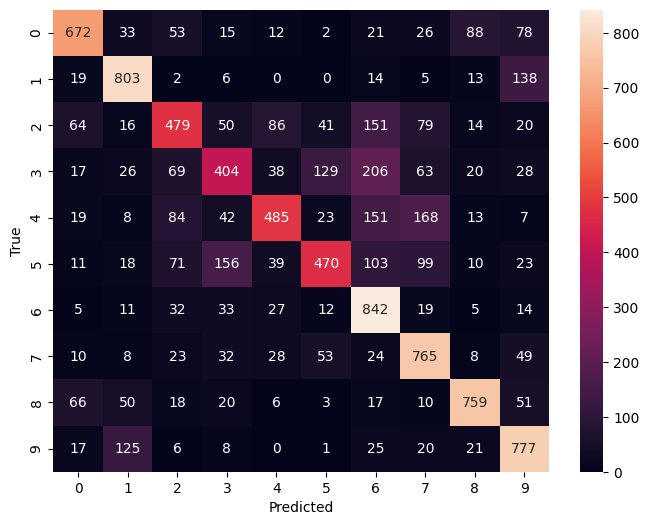

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
c=confusion_matrix(y_test_c10, y_pred)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_c10, y_pred_c10), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Day 04

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 210M/218M [00:00<00:00, 288MB/s]
100% 218M/218M [00:00<00:00, 328MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as  zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
'/content/dogs-vs-cats',
target_size=(224,224),
batch_size=32,
class_mode='binary',
subset='training'
)
val_generator = datagen. flow_from_directory(
'/content/dogs-vs-cats',
target_size=(224,224),
batch_size=32,
class_mode='binary',
subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import GlobalAveragePooling2D, Dense

base_model= MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3) )
base_model. trainable=False

model=Sequential ([base_model, GlobalAveragePooling2D(), Dense(128, activation= 'relu'), Dense(1 , activation='sigmoid' )])
model. compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])
model. fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.7867 - loss: 0.5392 - val_accuracy: 0.7985 - val_loss: 0.5174
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.8030 - loss: 0.4904 - val_accuracy: 0.7985 - val_loss: 0.5150
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.8000 - loss: 0.4793 - val_accuracy: 0.7985 - val_loss: 0.5166
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.8034 - loss: 0.4590 - val_accuracy: 0.7980 - val_loss: 0.5216
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.8046 - loss: 0.4437 - val_accuracy: 0.7561 - val_loss: 0.5636


In [ ]:
base_model. trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy' ])
model.fit(train_generator, epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1851s 7s/step - accuracy: 0.8019 - loss: 0.4810 - val_accuracy: 0.7621 - val_loss: 0.5576
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1830s 7s/step - accuracy: 0.8021 - loss: 0.4497 - val_accuracy: 0.7626 - val_loss: 0.5561
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1821s 7s/step - accuracy: 0.8111 - loss: 0.4150 - val_accuracy: 0.7736 - val_loss: 0.5541


In [ ]:
model.save('mobilenet_cats_dogs.h5')

import tensorflow as tf
loaded_model=tf. keras.models. load_model( 'mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step


/tmp/ipython-input-1772913221.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


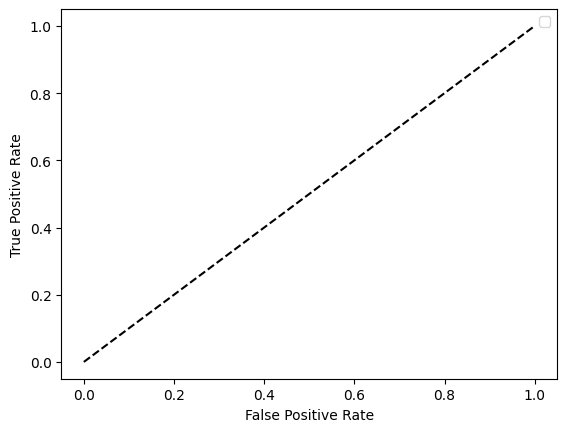

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=loaded_model.predict(val_generator)
fpr, tpr,_=roc_curve(val_generator.classes,y_pred_proba)

Noc_auc=auc(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Day 05

In [ ]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = '128px-Cute_dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image. img_to_array(img)
img_array = np. expand_dims (img_array, axis=0)
img_array = preprocess_input(img_array)
prediction = loaded_model. predict (img_array)
print ("Predicted class:", "Dog" if prediction [0][0] > 0.5 else "Cat")

Saving 128px-Cute_dog.jpg to 128px-Cute_dog.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Dog


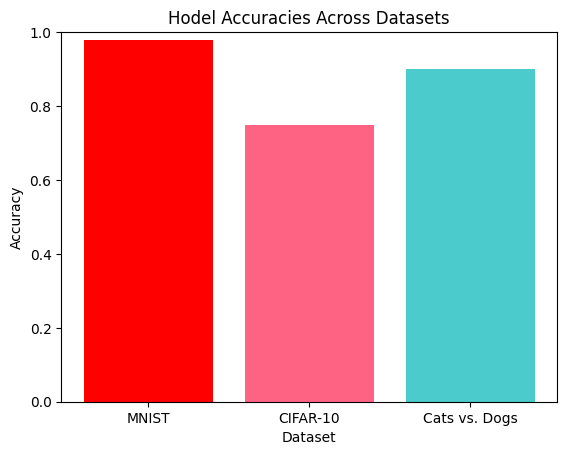

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10','Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt. bar (datasets, accuracies, color=['#FF0000','#FF6384','#4BCBCB'])
plt. title('Hodel Accuracies Across Datasets')
plt. xlabel ('Dataset' )
plt. ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [34]:

model.save("mobilenet_cats_dogs.h5")

import pickle
class_names = ['Cat', 'Dog']
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)

from google.colab import files
files.download("mobilenet_cats_dogs.h5")
files.download("class_names.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>